# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [283]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [284]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [285]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [286]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [287]:
# Which columns contain the features of the websites? menos Type

websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [288]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

websites.Type.value_counts()

# 1 es para sitios web maliciosos
# 0 para sitios web benignos

Type
0    1565
1     216
Name: count, dtype: int64

In [289]:
# 0 for bening 1 for maliciuos websites

In [290]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

categorical_columns = websites.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

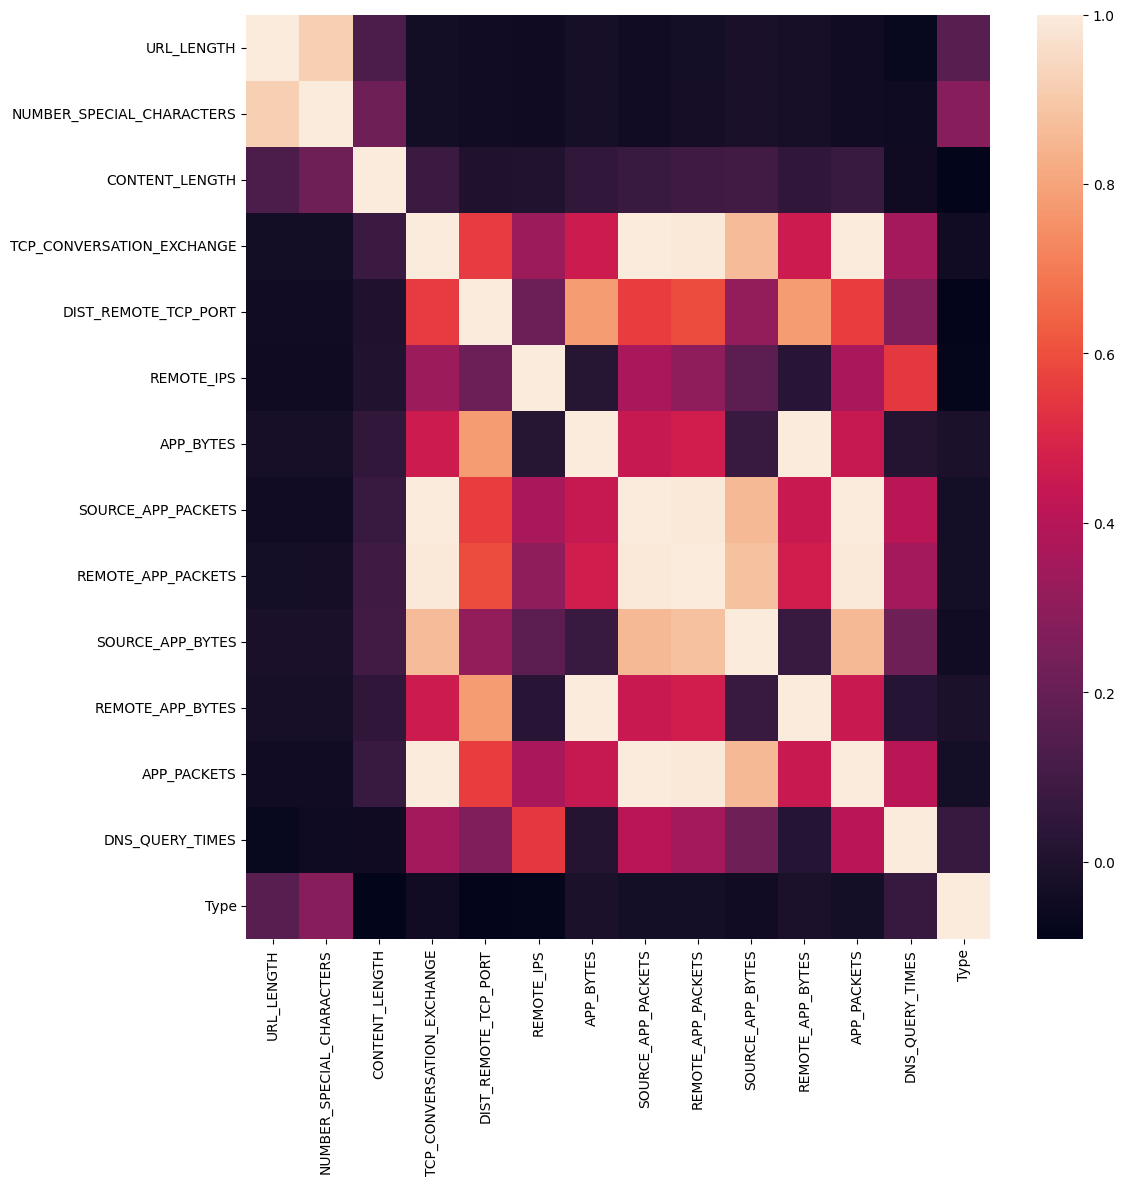

In [291]:
#  Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

plt.figure(figsize=(12,12))
sns.heatmap(websites.corr(numeric_only=True))
plt.show()

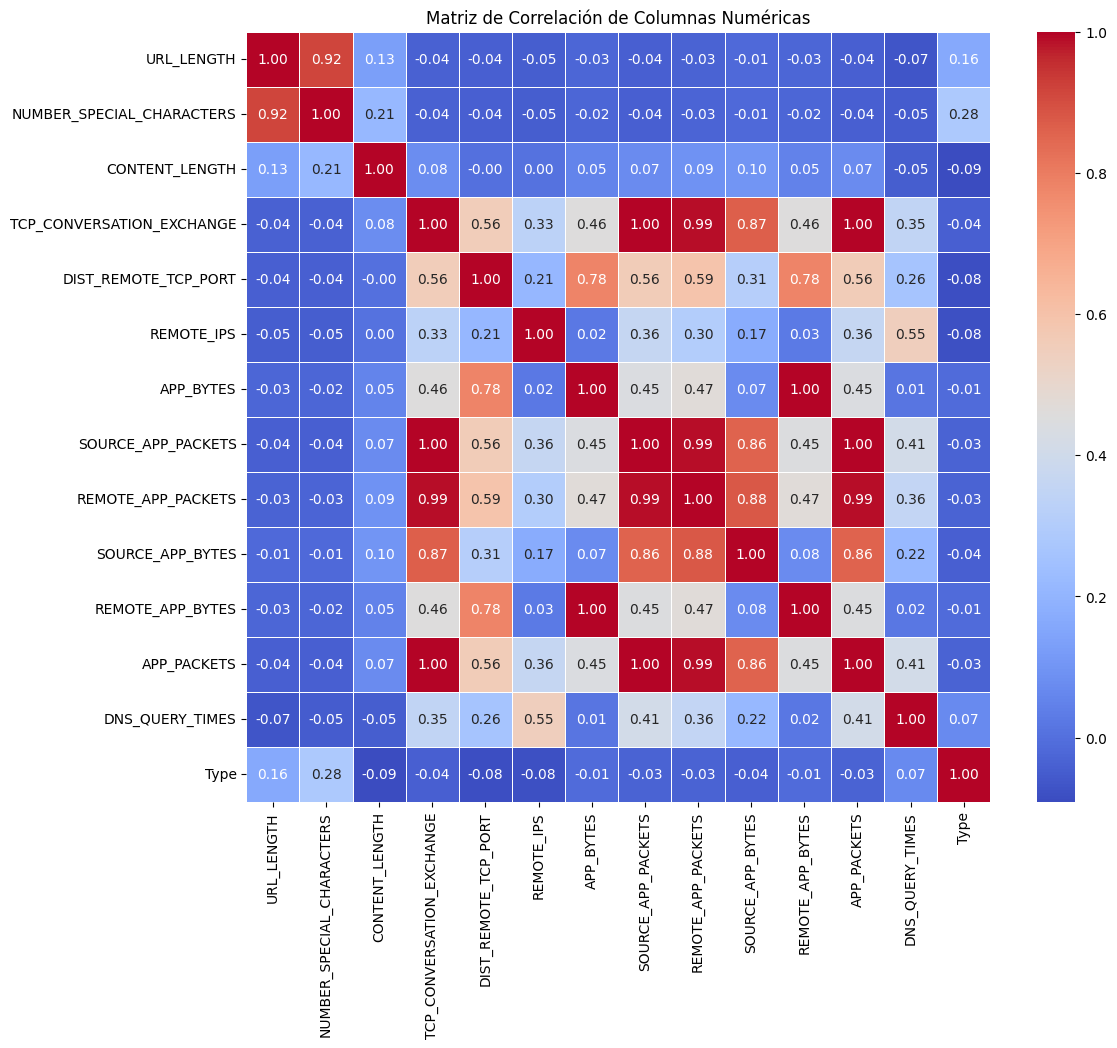

In [292]:
# 2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = websites[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Columnas Numéricas')
plt.show()

In [293]:
# 3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

# Extraer las correlaciones sin la diagonal (correlación consigo mismo)
correlation_values = correlation_matrix.unstack()
# Eliminar las correlaciones duplicadas (por ejemplo, entre columna A y B es lo mismo que entre columna B y A)
correlation_values = correlation_values[correlation_values < 1].drop_duplicates()

# Listar menor correlación
bottom_correlations = correlation_values.abs().sort_values(ascending=True).head(10)

print("\nBottom 5 Correlaciones Bajas:")
print(bottom_correlations)


Bottom 5 Correlaciones Bajas:
CONTENT_LENGTH             DIST_REMOTE_TCP_PORT    0.000381
                           REMOTE_IPS              0.004774
REMOTE_APP_BYTES           Type                    0.011004
APP_BYTES                  Type                    0.011262
                           DNS_QUERY_TIMES         0.012221
NUMBER_SPECIAL_CHARACTERS  SOURCE_APP_BYTES        0.014376
URL_LENGTH                 SOURCE_APP_BYTES        0.014857
REMOTE_APP_BYTES           DNS_QUERY_TIMES         0.016215
REMOTE_IPS                 APP_BYTES               0.023126
NUMBER_SPECIAL_CHARACTERS  APP_BYTES               0.023914
dtype: float64


### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [294]:
#! pip install xgboost

In [295]:
import xgboost as xgb
from xgboost import XGBClassifier  # For classification
from xgboost import XGBRegressor   # For regression

from sklearn.model_selection import train_test_split



# Assuming 'websites' is a DataFrame
X = websites._get_numeric_data().drop('Type', axis=1)  # Features
y = websites['Type']  # Target variable

In [296]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
model_xgb = XGBClassifier()  # Use XGBRegressor() for regression tasks

In [298]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [299]:
sort_idx = model_xgb.feature_importances_.argsort()

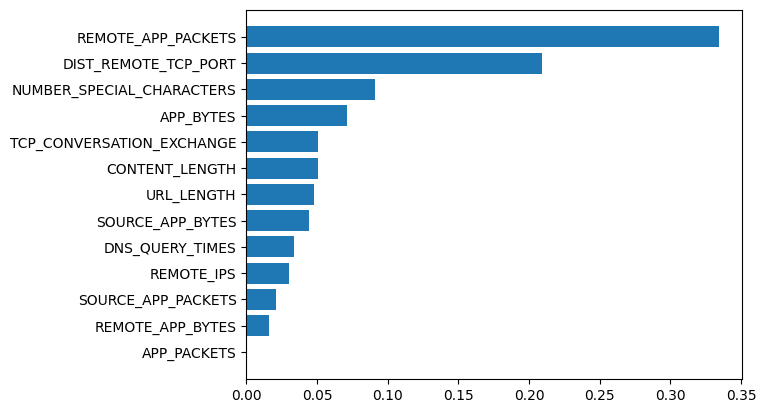

In [300]:
plt.barh(X.columns[sort_idx],model_xgb.feature_importances_[sort_idx])
plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

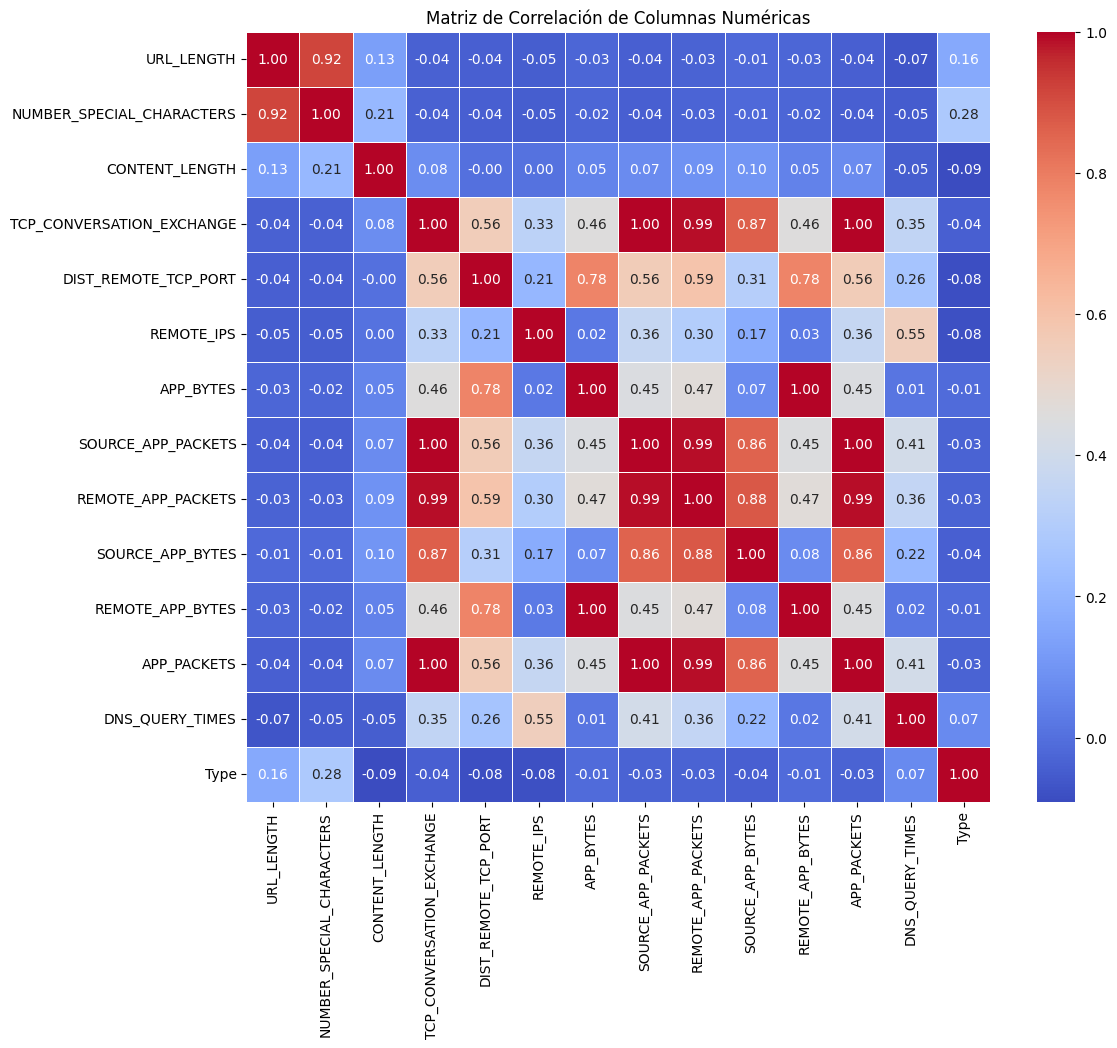

In [301]:
# Your code here


# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = websites[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Columnas Numéricas')
plt.show()

In [302]:
# Identificar las columnas con alta colinealidad
# Seleccionamos las columnas con correlación absoluta mayor al 0.9
# Seleccionar solo las columnas numéricas
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns

# Calcular la matriz de correlación utilizando solo columnas numéricas
corr_matrix = websites[numeric_columns].corr()
high_corr_vars = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) > 0.9]
high_corr_vars = list(set([tuple(sorted(x)) for x in high_corr_vars]))  # eliminar duplicados

# Crear un set de columnas a eliminar basado en alta colinealidad
columns_to_remove = set()
for var1, var2 in high_corr_vars:
    columns_to_remove.add(var2)  # Eliminar una de las dos columnas correlacionadas

# Limitar a las primeras 4 columnas para eliminar
columns_to_remove = list(columns_to_remove)[:4]

print(f"Columnas a eliminar: {columns_to_remove}")




Columnas a eliminar: ['REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES', 'TCP_CONVERSATION_EXCHANGE']


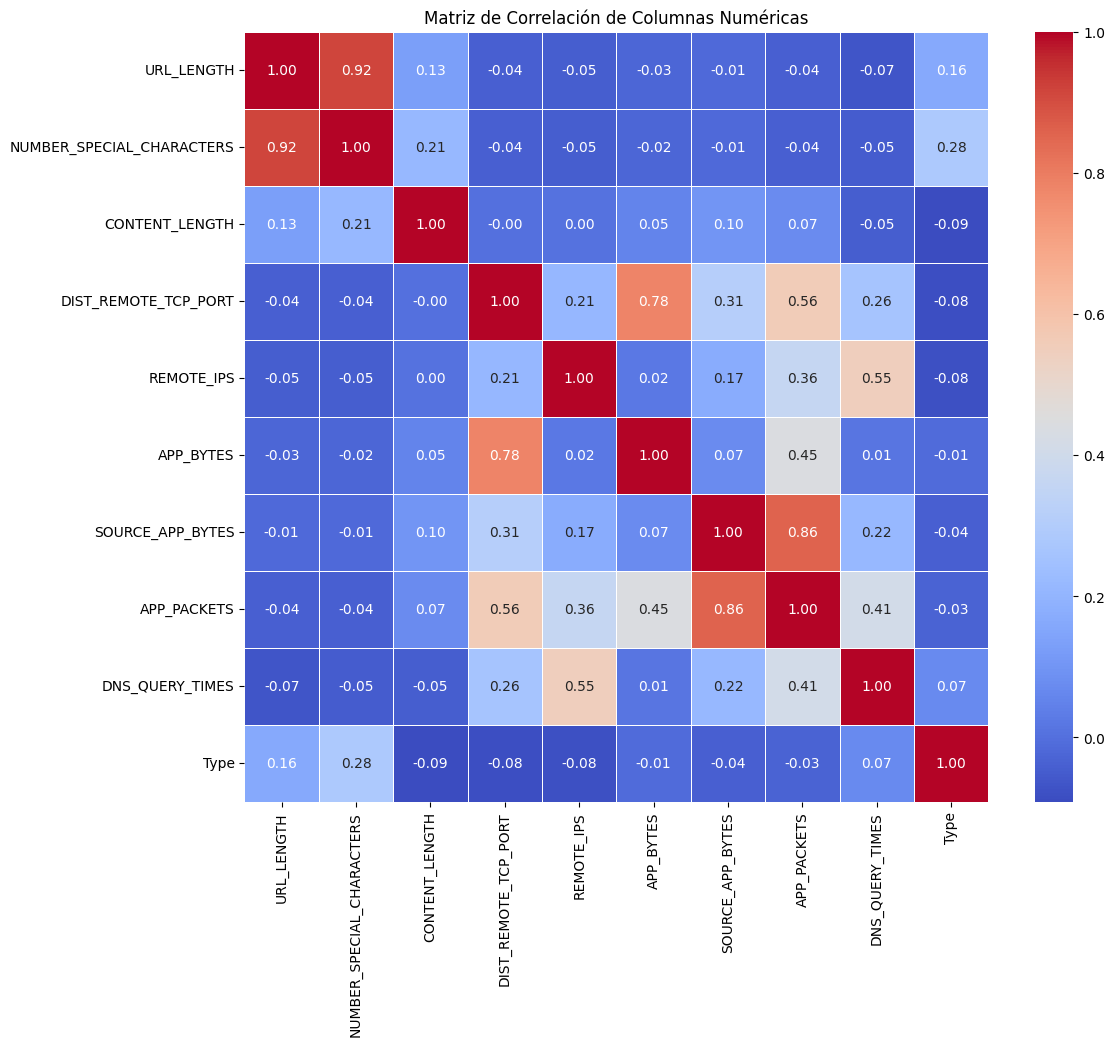

In [303]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY

def print_correlation_heatmap(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numeric_columns].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlación de Columnas Numéricas')
    plt.show()

    
# Eliminar las columnas seleccionadas
websites_cleaned = websites.drop(columns=columns_to_remove)

# Imprimir el mapa de calor después de eliminar columnas
print_correlation_heatmap(websites_cleaned)

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [304]:
nan_ser = websites.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

CONTENT_LENGTH        812
WHOIS_STATEPRO        362
WHOIS_COUNTRY         306
SERVER                176
WHOIS_UPDATED_DATE    139
WHOIS_REGDATE         127
CHARSET                 7
DNS_QUERY_TIMES         1
dtype: int64

In [305]:
# Firts we will drop the columns with more than 50% of missing data. NO HAY

missing_percentage = (websites.isnull().mean() * 100).sort_values(ascending=False).head(6)
print(missing_percentage)

CONTENT_LENGTH        45.592364
WHOIS_STATEPRO        20.325660
WHOIS_COUNTRY         17.181359
SERVER                 9.882089
WHOIS_UPDATED_DATE     7.804604
WHOIS_REGDATE          7.130825
dtype: float64


In [306]:
# Now we will drop the rows with missing data
websites = websites.dropna()

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [307]:
# Examine missing values in each column
nan_ser = websites.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

Series([], dtype: int64)

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [308]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [309]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])




In [310]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [311]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

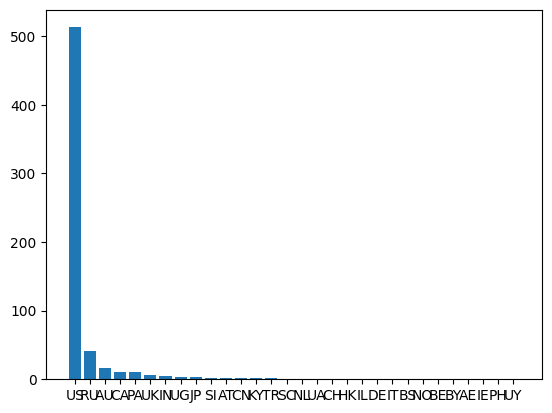

<Figure size 1500x1500 with 0 Axes>

In [312]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [313]:
# Your code here

websites.WHOIS_COUNTRY.value_counts()[:10]

WHOIS_COUNTRY
US    513
CA     41
UK     16
AU     11
PA     10
JP      6
CH      5
IN      4
AT      4
SC      2
Name: count, dtype: int64

In [314]:
# Primero, contamos las ocurrencias de cada país
country_counts = websites.WHOIS_COUNTRY.value_counts()

# Identificamos los países que tienen 10 o menos ocurrencias
countries_to_replace = country_counts[country_counts <= 10].index

# Reemplazamos esos países con 'OTHER' usando .loc[]
websites.loc[:, 'WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(countries_to_replace, 'OTHER')

# Verificamos los resultados
print(websites.WHOIS_COUNTRY.value_counts())


WHOIS_COUNTRY
US       513
OTHER     55
CA        41
UK        16
AU        11
Name: count, dtype: int64


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [315]:
# Your code here
# Eliminar columnas seleccionadas con valores faltantes
websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [316]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [317]:
websites.drop(columns=['URL'], inplace=True)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [334]:
print(websites.CHARSET.value_counts())

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [335]:
websites.SERVER.value_counts()

SERVER
Apache                    162
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          39
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64

In [336]:
# Definir los tipos de CHARSET que queremos conservar
valid_server = ['Apache', 'Microsoft-HTTPAPI/2.0', 'nginx', 'GSE']

# Reemplazar los CHARSET que no están en valid_charsets por 'Other'
websites['SERVER'] = websites['SERVER'].apply(lambda x: x if x in valid_charsets else 'Other')

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [339]:
websites.SERVER.value_counts()

SERVER
Other                    293
Apache                   162
Microsoft-HTTPAPI/2.0     76
nginx                     59
GSE                       46
Name: count, dtype: int64

OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [340]:
# Your code here
websites.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [344]:
# Convertir las columnas categóricas en variables dummy
website_dummy = pd.get_dummies(websites, drop_first=True)

website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,CHARSET_utf-8,CHARSET_windows-1251,SERVER_GSE,SERVER_Microsoft-HTTPAPI/2.0,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,True,False,False,False,True
6,18,6,345.0,12,0,3,1189,14,13,8559,...,False,False,False,False,True,False,False,False,False,True
7,19,6,324.0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
11,20,6,324.0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
16,21,7,686.0,6,0,2,603,8,9,1580,...,False,False,False,False,False,True,False,True,False,False


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [347]:
# Your code here
websites= website_dummy

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [348]:
from sklearn.model_selection import train_test_split


# Elimino la columna class que es lo que queremos saber
X = websites.drop('Type', axis=1)
y = websites['Type']
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [351]:
# Importar LogisticRegression 
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
logreg_model = LogisticRegression()

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [352]:
logreg_model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [353]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Realiza predicciones en el conjunto de prueba
y_pred = logreg_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.97
Precision: 1.00
Recall: 0.56
Confusion Matrix:
[[119   0]
 [  4   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       119
           1       1.00      0.56      0.71         9

    accuracy                           0.97       128
   macro avg       0.98      0.78      0.85       128
weighted avg       0.97      0.97      0.96       128



¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

Cade destacar la PRecision de 1, lo que significa que lo que se predijo positivo realmente es positivo. Pero el Recall es 0,56 que es un valor bajo..

Desbalance de Clases: Hay un fuerte desbalance entre las clases, lo que afecta el rendimiento del modelo. El modelo tiene un buen rendimiento en la clase mayoritaria (0), pero no logra identificar adecuadamente la clase minoritaria (1).

Necesidad de Mejorar el Recall de la Clase 1: El bajo recall para la clase 1 sugiere que el modelo no está capturando adecuadamente las instancias de esta clase. Esto puede ser crítico dependiendo del contexto del problema (por ejemplo, si la clase 1 representa eventos raros pero importantes).

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [354]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo con max_depth=3
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)


Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [355]:
# Calcular las probabilidades predichas
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Decidir 0 o 1 utilizando un umbral de 0.5
y_pred_tree_threshold = (y_prob_tree >= 0.5).astype(int) #Comparamos las probabilidades predichas con el umbral de 0.5 y asignamos 1 si la probabilidad es mayor o igual a 0.5, y 0 en caso contrario.

# Evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_tree_threshold = accuracy_score(y_test, y_pred_tree_threshold)
precision_tree_threshold = precision_score(y_test, y_pred_tree_threshold)
recall_tree_threshold = recall_score(y_test, y_pred_tree_threshold)
conf_matrix_tree_threshold = confusion_matrix(y_test, y_pred_tree_threshold)
class_report_tree_threshold = classification_report(y_test, y_pred_tree_threshold)

# Imprimir métricas
print(f"Accuracy: {accuracy_tree_threshold:.2f}")
print(f"Precision: {precision_tree_threshold:.2f}")
print(f"Recall: {recall_tree_threshold:.2f}")
print("Confusion Matrix:")
print(conf_matrix_tree_threshold)
print("Classification Report:")
print(class_report_tree_threshold)


Accuracy: 0.92
Precision: 0.00
Recall: 0.00
Confusion Matrix:
[[118   1]
 [  9   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       119
           1       0.00      0.00      0.00         9

    accuracy                           0.92       128
   macro avg       0.46      0.50      0.48       128
weighted avg       0.86      0.92      0.89       128



#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [358]:

# Inicializar el modelo con max_depth=5
tree_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
tree_model_5.fit(X_train, y_train)

# Calcular las probabilidades predichas
y_prob_tree_5 = tree_model_5.predict_proba(X_test)[:, 1]

# Decidir 0 o 1 utilizando un umbral de 0.5
y_pred_tree_5_threshold = (y_prob_tree_5 >= 0.5).astype(int)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_tree_5_threshold = accuracy_score(y_test, y_pred_tree_5_threshold)
precision_tree_5_threshold = precision_score(y_test, y_pred_tree_5_threshold)
recall_tree_5_threshold = recall_score(y_test, y_pred_tree_5_threshold)
conf_matrix_tree_5_threshold = confusion_matrix(y_test, y_pred_tree_5_threshold)
class_report_tree_5_threshold = classification_report(y_test, y_pred_tree_5_threshold)

# Imprimir métricas
print(f"Accuracy: {accuracy_tree_5_threshold:.2f}")
print(f"Precision: {precision_tree_5_threshold:.2f}")
print(f"Recall: {recall_tree_5_threshold:.2f}")
print("Confusion Matrix:")
print(conf_matrix_tree_5_threshold)
print("Classification Report:")
print(class_report_tree_5_threshold)

Accuracy: 0.95
Precision: 0.67
Recall: 0.44
Confusion Matrix:
[[117   2]
 [  5   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       0.67      0.44      0.53         9

    accuracy                           0.95       128
   macro avg       0.81      0.71      0.75       128
weighted avg       0.94      0.95      0.94       128



¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:


Comparando los resultados de los dos modelos:

Accuracy:

El modelo con max_depth=3 tiene una precisión de 0.92.
El modelo con max_depth=5 tiene una precisión de 0.95.
Conclusión: El modelo con max_depth=5 tiene una precisión ligeramente mejor.
Precision y Recall:

El modelo con max_depth=3 no predice ninguna instancia de la clase 1 correctamente (precisión y recall son 0.00).
El modelo con max_depth=5 tiene una precisión de 0.67 y un recall de 0.44 para la clase 1.
Conclusión: El modelo con max_depth=5 tiene un mejor rendimiento en términos de precisión y recall para la clase 1.
Matriz de confusión:

El modelo con max_depth=3 clasifica correctamente la mayoría de las instancias de la clase 0, pero falla completamente en la clase 1.
El modelo con max_depth=5 clasifica correctamente más instancias de la clase 1 (4 de 9) y tiene menos falsos negativos y falsos positivos.
Conclusión: El modelo con max_depth=5 tiene un mejor equilibrio en la clasificación de ambas clases.
En resumen, el modelo con max_depth=5 tiene un mejor rendimiento general y es más eficaz para clasificar correctamente ambas clases, aunque la clase minoritaria (clase 1) sigue siendo un desafío. Esto sugiere que el ajuste fino de la profundidad del árbol y posiblemente la exploración de otros hiperparámetros o algoritmos puede ayudar a mejorar aún más el rendimiento en la predicción de la clase minoritaria.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [362]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar RobustScaler
scaler = RobustScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)



# Entrenar el modelo de regresión logística con los datos escalados
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones con los datos de prueba escalados
y_pred_scaled = model.predict(X_test_scaled)

# Calcular la puntuación de precisión
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
class_report_scaled = classification_report(y_test, y_pred_scaled)

print(f"Accuracy (scaled): {accuracy_scaled:.2f}")
print(f"Precision (scaled): {precision_scaled:.2f}")
print(f"Recall (scaled): {recall_scaled:.2f}")
print("Confusion Matrix (scaled):")
print(conf_matrix_scaled)
print("Classification Report (scaled):")
print(class_report_scaled)



Accuracy (scaled): 0.93
Precision (scaled): 0.67
Recall (scaled): 0.36
Confusion Matrix (scaled):
[[115   2]
 [  7   4]]
Classification Report (scaled):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       117
           1       0.67      0.36      0.47        11

    accuracy                           0.93       128
   macro avg       0.80      0.67      0.72       128
weighted avg       0.92      0.93      0.92       128



## Conclusiones:

Accuracy:

Sin Escalado: 0.97
Con Escalado: 0.93
Comparación: La precisión general (accuracy) ha disminuido con el escalado. Esto sugiere que el modelo puede no estar generalizando tan bien después del escalado de características.


Precision:
Sin Escalado: 1.00
Con Escalado: 0.67
Comparación: La precisión (precision) para la clase positiva ha disminuido significativamente. Esto indica que el modelo es menos efectivo en la identificación de la clase positiva después del escalado.


Recall:
Sin Escalado: 0.56
Con Escalado: 0.36
Comparación: La capacidad del modelo para recuperar la clase positiva (recall) también ha disminuido. Esto sugiere que el modelo está identificando menos casos positivos correctamente después del escalado.


Confusion Matrix:
Sin Escalado:
lua
Copiar código
[[119   0]
 [  4   5]]
Con Escalado:
lua
Copiar código
[[115   2]
 [  7   4]]


Comparación: El número de verdaderos negativos y falsos negativos ha cambiado. Con el escalado, hay más falsos negativos (casos positivos no identificados) y menos verdaderos negativos.


Classification Report:
Sin Escalado: Mayor precisión y recall para la clase positiva.
Con Escalado: Mayor precisión para la clase negativa, pero menor precisión y recall para la clase positiva.


Conclusión:
El escalado de características usando RobustScaler no ha mejorado el rendimiento del modelo de regresión logística en términos de precisión, recall, y accuracy. De hecho, los resultados sugieren que el modelo ha empeorado para identificar la clase positiva. El escalado puede haber introducido cambios en la distribución de las características que hicieron que el modelo de regresión logística se desempeñara peor en este caso específico.

El rendimiento del modelo sin escalado parece ser mejor en este contexto. Es posible que el escalado no sea necesario o incluso contraproducente para el modelo en este caso.